In [37]:
import pandas as pd

In [38]:
import numpy as np

In [39]:
import matplotlib

In [40]:
from matplotlib import pyplot as plt

In [41]:
import sklearn

In [42]:
from sklearn import linear_model

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
data=pd.read_csv('diamonds.xls')
data

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757


In [45]:
data[['carat','depth','table','price']].corr()#check dependency

,carat,depth,table,price
carat,1.000000,0.028224,0.181618,0.921591
depth,0.028224,1.000000,-0.295779,-0.010647
table,0.181618,-0.295779,1.000000,0.127134
price,0.921591,-0.010647,0.127134,1.000000


In [46]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
label_encoder=LabelEncoder()

In [49]:
data['cut_encoder']=label_encoder.fit_transform(data['cut'])

In [50]:
data['color_encoder']=label_encoder.fit_transform(data['color'])

In [51]:
data['clarity_encoder']=label_encoder.fit_transform(data['clarity'])

In [52]:
data

,carat,cut,color,clarity,depth,table,price,cut_encoder,color_encoder,clarity_encoder
0,0.23,Ideal,E,SI2,61.5,55.0,326,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,1,6,3
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,2,0,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,1,0,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,4,0,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,3,4,3


In [53]:
data.drop(['cut','color','clarity'],axis=1,inplace=True)
data

,carat,depth,table,price,cut_encoder,color_encoder,clarity_encoder
0,0.23,61.5,55.0,326,2,1,3
1,0.21,59.8,61.0,326,3,1,2
2,0.23,56.9,65.0,327,1,1,4
3,0.29,62.4,58.0,334,3,5,5
4,0.31,63.3,58.0,335,1,6,3
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,2,0,2
53936,0.72,63.1,55.0,2757,1,0,2
53937,0.70,62.8,60.0,2757,4,0,2
53938,0.86,61.0,58.0,2757,3,4,3


In [54]:
data['cut_encoder'].unique()

array([2, 3, 1, 4, 0])

In [55]:
data['color_encoder'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [56]:
data['color_encoder'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [57]:
data

,carat,depth,table,price,cut_encoder,color_encoder,clarity_encoder
0,0.23,61.5,55.0,326,2,1,3
1,0.21,59.8,61.0,326,3,1,2
2,0.23,56.9,65.0,327,1,1,4
3,0.29,62.4,58.0,334,3,5,5
4,0.31,63.3,58.0,335,1,6,3
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,2,0,2
53936,0.72,63.1,55.0,2757,1,0,2
53937,0.70,62.8,60.0,2757,4,0,2
53938,0.86,61.0,58.0,2757,3,4,3


In [58]:
x=data[['carat','depth','table','cut_encoder','color_encoder','clarity_encoder']]
x

,carat,depth,table,cut_encoder,color_encoder,clarity_encoder
0,0.23,61.5,55.0,2,1,3
1,0.21,59.8,61.0,3,1,2
2,0.23,56.9,65.0,1,1,4
3,0.29,62.4,58.0,3,5,5
4,0.31,63.3,58.0,1,6,3
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2,0,2
53936,0.72,63.1,55.0,1,0,2
53937,0.70,62.8,60.0,4,0,2
53938,0.86,61.0,58.0,3,4,3


In [59]:
y=data[['price']]

## train test split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)#30%

In [62]:
our_model=linear_model.LinearRegression()


In [63]:
our_model.fit(x_train,y_train)

LinearRegression()

In [64]:
our_model.predict(x_test)

array([[10207.81881016],
       [ 5096.8022115 ],
       [ 1786.44795058],
       ...,
       [ 3683.39868724],
       [ 5971.98462493],
       [ -823.51822992]])

In [65]:
y_test

,price
17765,7154
8857,4480
46287,1755
889,2874
22954,11003
...,...
10108,4717
39926,1105
53090,2613
14775,5946


In [66]:
our_model.score(x_train,y_train)

0.8795090433958784

In [67]:
our_model.score(x_test,y_test)

0.8822723614658726

In [68]:
our_model.predict([[0.21,59.8,61.0,3,1,2]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1203.76053057]])

In [69]:
our_model.predict([[0.75,62.2,55.0,2,0,3]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4088.16348662]])

In [73]:
#pair plot

In [78]:
import seaborn as sns

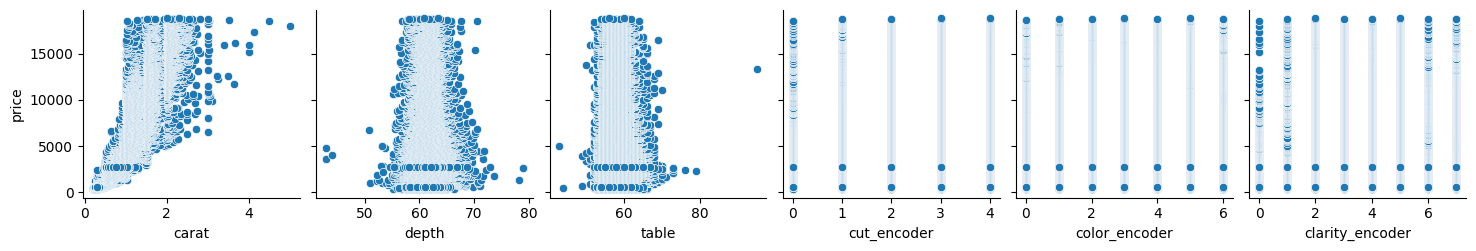

In [82]:
sns.pairplot(data,x_vars=['carat','depth','table','cut_encoder','color_encoder','clarity_encoder'],y_vars=['price'])

In [80]:
a=our_model.predict(x_test)

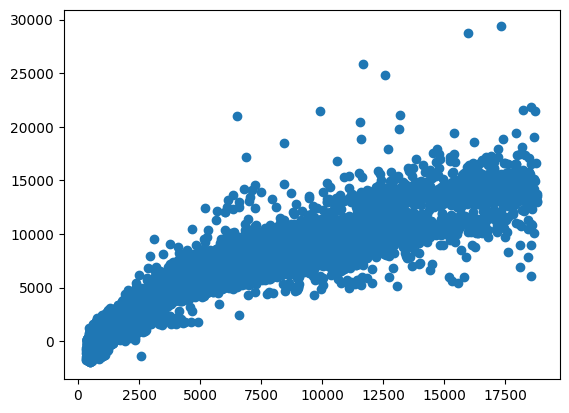

In [81]:
plt.scatter(y_test,a)